In [27]:
import kagglehub
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from pathlib import Path

Carregar dataset

In [28]:
path = kagglehub.dataset_download("kshitij192/cars-image-dataset") 
root = Path(path).parent
imagens = root / "3" / "Cars Dataset" #configura o caminho do dataset de imagens para que a variavel imagens aponte para ele

dataset escolhido já vinha pré-divido em treino e teste

In [29]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( #define o dataset de treino
    directory=imagens / "train",
    seed=123,
    image_size=(180, 180),  
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory( #define o dataset de teste
    directory=imagens / "test",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [30]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [31]:
AUTOTUNE = tf.data.AUTOTUNE
train=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Modelo CNN sequencial

In [32]:
model = models.Sequential([
    layers.Input(shape=(180, 180, 3)), #camada de entrada
    layers.Rescaling(1./255), #normalização dos dados
    layers.Conv2D(32, (3, 3), activation='relu'), #camada convolucional com 32 filtros (oculta)
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'), #camada convolucional com 64 filtros (oculta)
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'), #camada convolucional com 128 filtros (oculta))
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(100, activation='relu'), #100 neurônios na camada densa (oculta)
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') #camada de saída com ativação softmax
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10  #iterações
) 

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.2435 - loss: 1.9815

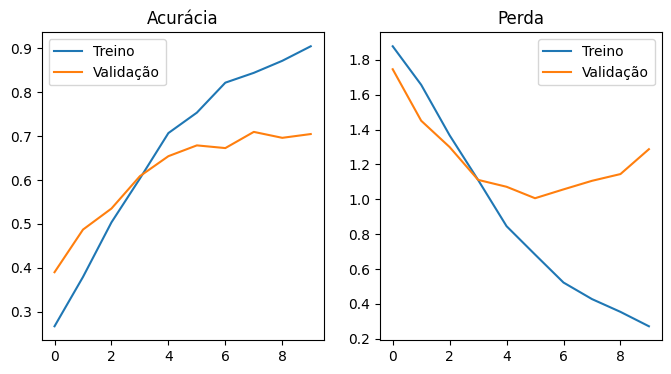

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.title('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Treino')
plt.plot(val_loss, label='Validação')
plt.title('Perda')
plt.legend()
plt.show()
